# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Fathan Shani Putra Aliadi
- **Email:** fathanshani.fs@gmail.com
- **ID Dicoding:** fathanshani

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam beberapa musim terakhir?
- Pada jam berapa puncak penyewaan terjadi pada setiap harinya?

## Import Semua Packages/Library yang Digunakan

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Melakukan import library atau modul yang dibutuhkan


*   pandas (untuk memuat dan manipulasi dataframe)
*   numpy (untuk melakukan operasi array atau matriks)
*   matplotlib dan seaborn (untuk visualisasi data)



## Data Wrangling

### Gathering Data

**Memuat tabel day**

In [67]:
daily_df = pd.read_csv("./day.csv")
daily_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Memuat tabel hour**

In [68]:
hourly_df = pd.read_csv("./hour.csv")
hourly_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Menilai Data day_df**

In [69]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Menurut hasil dari fungsi info() terhadap dataframe daily_df:


*   terdapat 731 index
*   tidak terdapat missing value
*   kolom "dteday" memiliki value berupa tanggal, namun memiliki tipe data object. Tipe data ini perlu dirubah pada tahap cleaning data



In [70]:
daily_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Melakukan pengecekan ulang terhadapa dataframe untuk mengkonfirmasi pada tiap kolom atau series bahwa tidak terdapat adanya missing value pada sebuah index.

In [71]:
print("Jumlah duplikasi: ", daily_df.duplicated().sum())
daily_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000




*   Melakukan pengecekan duplikasi terhadap dataframe daily_df. Dengan hasil, tidak ada duplikasi.
*   Menggunakan fungsi describe() untuk mendapatkan ringkasan mengenai statistik deskriptif pada dataframe.



**Menilai Data hour_df**

In [72]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Menurut hasil dari fungsi info() terhadap dataframe daily_df:


*   terdapat 17379 index
*   tidak terdapat missing value
*   kolom "dteday" memiliki value berupa tanggal, namun memiliki tipe data object. Tipe data ini perlu dirubah pada tahap cleaning data

In [74]:
hourly_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Melakukan pengecekan ulang terhadapa dataframe untuk mengkonfirmasi pada tiap kolom atau series bahwa tidak terdapat adanya missing value pada sebuah index.

In [73]:
print("Jumlah duplikasi: ", hourly_df.duplicated().sum())
hourly_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


*   Melakukan pengecekan duplikasi terhadap dataframe daily_df. Dengan hasil, tidak ada duplikasi.
*   Menggunakan fungsi describe() untuk mendapatkan ringkasan mengenai statistik deskriptif pada dataframe.

### Cleaning Data

**Membersihkan data data_df**

In [75]:
datetime_columns = "dteday"

daily_df[datetime_columns] = pd.to_datetime(daily_df[datetime_columns])

Mengganti tipe data pada kolom "dteday" menjadi datetime

In [76]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengecek kembali apakah tipe data sudah berubah.

In [77]:
daily_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
354,355,2011-12-21,1,0,12,0,3,1,2,0.428333,0.428017,0.858333,0.221400,107,2553,2660
306,307,2011-11-03,4,0,11,0,4,1,1,0.408333,0.405921,0.702083,0.136817,318,3656,3974
676,677,2012-11-07,4,1,11,0,3,1,2,0.295833,0.274621,0.547500,0.304108,326,4709,5035
549,550,2012-07-03,3,1,7,0,2,1,1,0.780833,0.702650,0.492083,0.126237,1052,5608,6660
388,389,2012-01-24,1,1,1,0,2,1,1,0.342500,0.349108,0.835833,0.123767,439,3900,4339


Menampilkan 5 sampel index acak.

**Membersihkan Data hour_df**

In [78]:
datetime_columns = "dteday"

hourly_df[datetime_columns] = pd.to_datetime(hourly_df[datetime_columns])

Mengganti tipe data pada kolom "dteday" menjadi datetime

In [79]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Mengecek kembali apakah tipe data sudah berubah.

In [127]:
hourly_df = hourly_df.rename(columns={"weathersit":"weather","yr":"year","mnth":"month","hr":"hour","hum":"humidity","cnt":"count"})

Mengganti nama kategori kolom agar dapat mudah dimengerti.

In [128]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

Memastikan apakah nama kategori kolom telah berubah.

In [80]:
hourly_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2381,2382,2011-04-14,2,0,4,3,0,4,1,1,0.34,0.3333,0.81,0.1343,0,2,2
13031,13032,2012-07-02,3,1,7,4,0,1,1,2,0.72,0.6667,0.54,0.2985,2,10,12
8880,8881,2012-01-10,1,1,1,21,0,2,1,1,0.32,0.3333,0.66,0.0896,7,109,116
855,856,2011-02-08,1,0,2,2,0,2,1,2,0.26,0.2727,0.93,0.1045,1,1,2
15944,15945,2012-11-02,4,1,11,1,0,5,1,1,0.32,0.3182,0.66,0.1642,5,19,24


Menampilkan 5 sampel index acak.

## Exploratory Data Analysis (EDA)

### Explore hour_df data

Pada tahap ini, Saya akan menggunakan dataframe hourly_df saja. Karena kedua dataset hanya berbeda penyajiannya. daily_df merupakan jumlah sewa per hari, sedangkan hourly_df merupakan jumlah sewa per jam.

In [131]:
hourly_df.describe(include="all")

<ipython-input-131-5a462fa8dcc4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hourly_df.describe(include="all")


,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Menampilkan statistik deskriptif secara keseluruhan alphanumerik dari dataframe "hourly_df"

In [130]:
hourly_df.groupby(by="hour").agg({
    "count": ["max", "min", "mean", "median","std"]
})

count                                   
       max min        mean median         std
hour                                         
0      283   2   53.898072   40.0   42.307910
1      168   1   33.375691   20.0   33.538727
2      132   1   22.869930   11.0   26.578642
3       79   1   11.727403    6.0   13.239190
4       28   1    6.352941    6.0    4.143818
5       66   1   19.889819   19.0   13.200765
6      213   1   76.044138   76.0   55.084348
7      596   1  212.064649  208.0  161.441936
8      839   5  359.011004  385.0  235.189285
9      426  14  219.309491  216.0   93.703458
10     539   8  173.668501  147.0  102.205413
11     663  10  208.143054  180.0  127.495536
12     776   3  253.315934  229.0  145.081134
13     760  11  253.661180  224.0  148.107657
14     750  12  240.949246  212.0  147.271574
15     750   7  251.233196  227.0  144.632541
16     783  11  311.983562  304.5  148.682618
17     976  15  461.452055  475.0  232.656611
18     977  23  425.510989  418.5  224.639304
19     743  11  311.523352  309.5  161.050359
20     567  11  226.030220  223.5  119.670164
21     584   6  172.314560  173.5   89.788893
22     502   9  131.335165  129.0   69.937782
23     256   2   87.831044   80.0   50.846889

Menampilkan stastistik desktriptif dengan tabel pivot berdasarkan jam.

In [126]:
hourly_df.groupby(by="season").agg({
    "count": ["max", "min", "mean", "median","std"]
})

count                                   
         max min        mean median         std
season                                         
1        801   1  111.114569   76.0  119.224010
2        957   1  208.344069  165.0  188.362473
3        977   1  236.016237  199.0  197.711630
4        967   1  198.868856  155.5  182.967972

Menampilkan stastistik desktriptif dengan tabel pivot berdasarkan musim.

[Text(0.5, 1.0, 'Jumlah sepeda yang disewa per musim')]

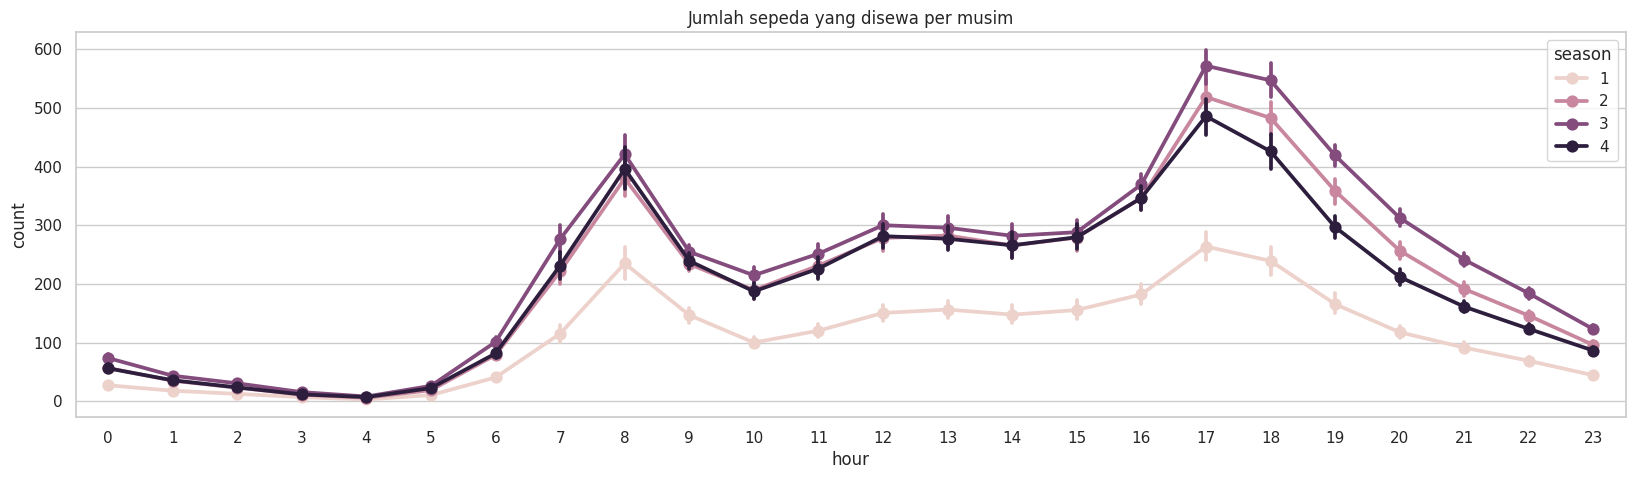

In [138]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hourly_df, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Jumlah sepeda yang disewa per musim')

Menampilkan visualisasi data antara kolom variabel "hour" dan "count" dengan pembeda "season".

In [133]:
hourly_df.groupby(by="year").agg({
    "count": ["max", "min", "mean", "median","std"]
})

count                                   
       max min        mean median         std
year                                         
0      651   1  143.794448  109.0  133.797854
1      977   1  234.666361  191.0  208.910941

Menampilkan stastistik desktriptif dengan tabel pivot berdasarkan musim.

[Text(0.5, 1.0, 'Jumlah sepeda yang disewa per tahun')]

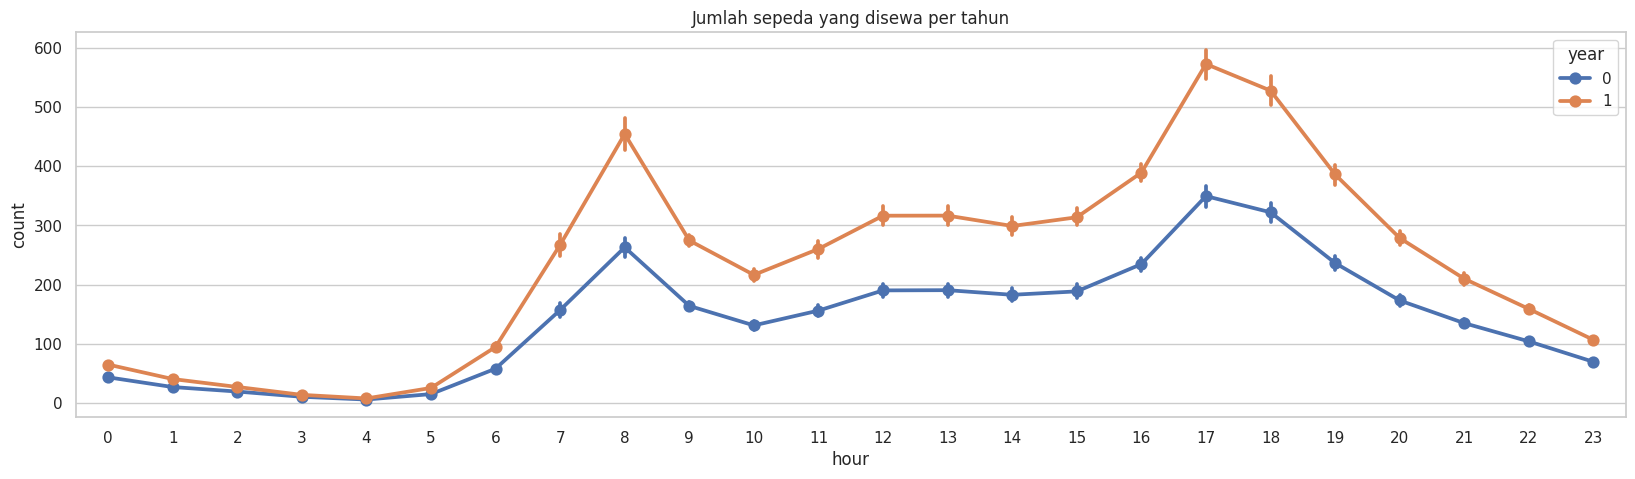

In [140]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hourly_df, x='hour', y='count', hue='year', ax=ax)
ax.set(title='Jumlah sepeda yang disewa per tahun')

Menampilkan visualisasi data antara kolom variabel "hour" dan "count" dengan pembeda "year".

In [135]:
hourly_df.groupby(by="month").agg({
    "count": ["max", "min", "mean", "median","std"]
})


count                                   
        max min        mean median         std
month                                         
1       559   1   94.424773   66.0   99.907146
2       610   1  112.865026   82.0  112.486565
3       957   1  155.410726  104.0  163.543050
4       822   1  187.260960  136.0  181.137902
5       873   1  222.907258  188.5  187.721497
6       900   1  240.515278  203.0  196.038950
7       913   1  231.819892  202.0  187.483806
8       941   1  238.097627  204.0  200.444648
9       977   1  240.773138  190.0  214.609531
10      963   1  222.158511  174.0  203.477057
11      729   1  177.335421  145.0  158.973887
12      759   1  142.303439  106.0  141.080674

Menampilkan stastistik desktriptif dengan tabel pivot berdasarkan musim.

[Text(0.5, 1.0, 'Jumlah sepeda yang disewa per bulan')]

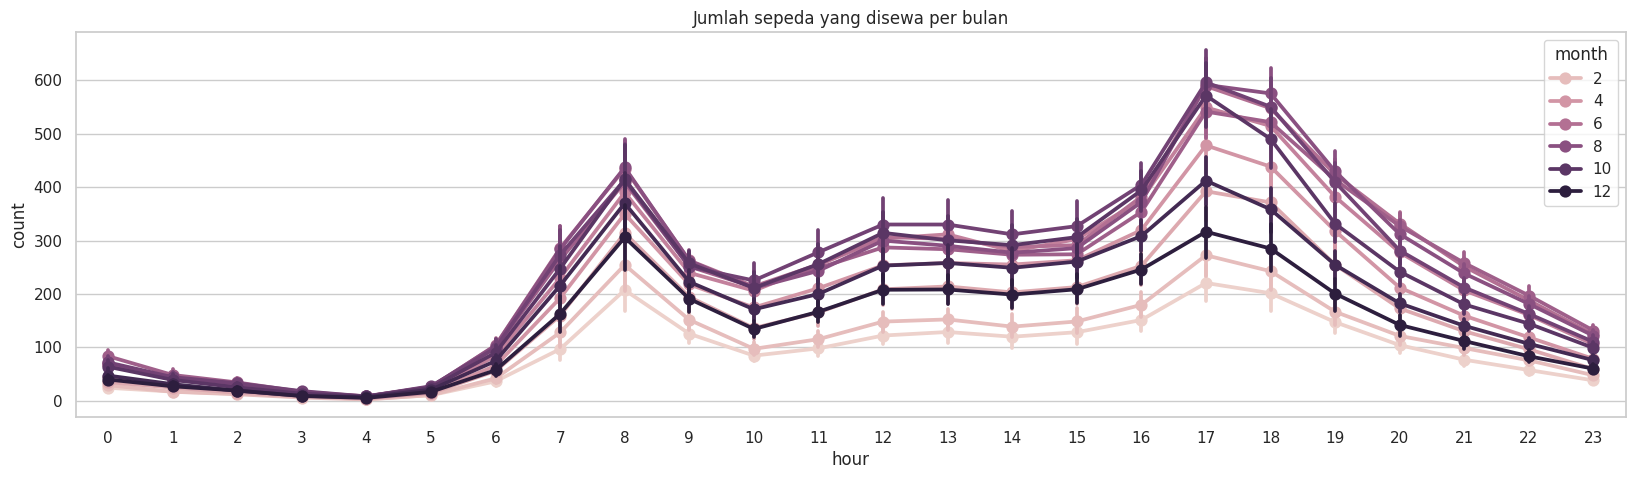

In [142]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hourly_df, x='hour', y='count', hue='month', ax=ax)
ax.set(title='Jumlah sepeda yang disewa per bulan')

Menampilkan visualisasi data antara kolom variabel "hour" dan "count" dengan pembeda "month".

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda dalam beberapa musim terakhir?

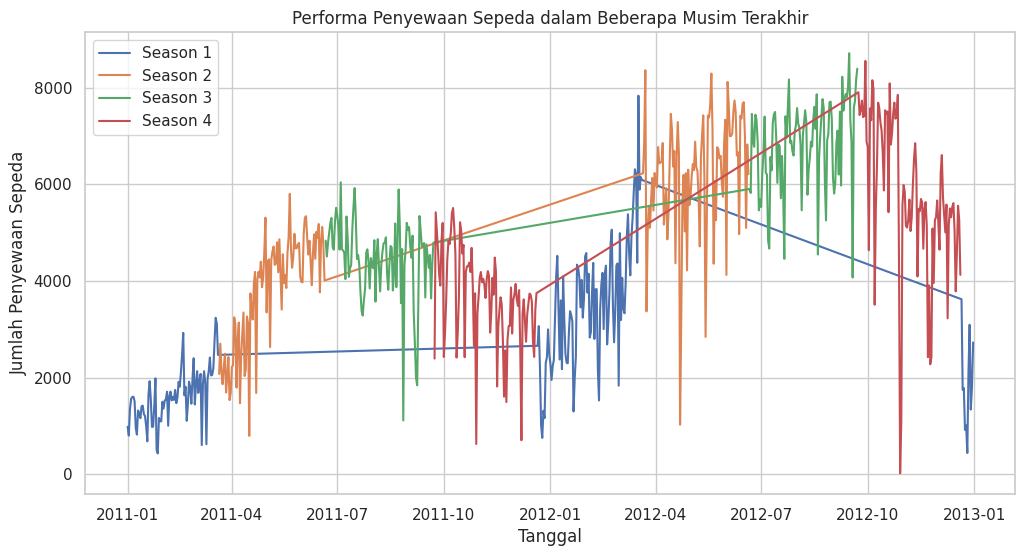

In [114]:
# Mengambil data untuk dua tahun terakhir
recent_years_data = hourly_df[hourly_df['dteday'].dt.year.isin([2011, 2012])]

# Memilih kolom yang akan digunakan untuk analisis
selected_columns = ['dteday', 'season', 'cnt']

# Menghitung jumlah penyewaan sepeda per musim
seasonal_rentals = recent_years_data[selected_columns].groupby(['season', 'dteday']).sum().reset_index()

# Membuat plot untuk performa penyewaan sepeda dalam beberapa musim terakhir
plt.figure(figsize=(12, 6))
for season in range(1, 5):
    seasonal_data = seasonal_rentals[seasonal_rentals['season'] == season]
    plt.plot(seasonal_data['dteday'], seasonal_data['cnt'], label=f"Season {season}")

plt.title('Performa Penyewaan Sepeda dalam Beberapa Musim Terakhir')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend()
plt.grid(True)
plt.show()

Beberapa poin yang dapat diambil dari analisis mengenai pertanyaan tersebut:
* Tiap awal season/musim 1 (musim semi) ke akhir season 2 (musim panas) mengalami kenaikan
* Pada season 3 (musim gugur) penyewaan relative linear walaupun terjadi naik-turunya angka penyewaan
* Pada awal season 4 (musim dingin) terjadi penurun angka penyewaan
* Setiap tahun, angka penyewaan sepeda mengalami kenaikan

### Pertanyaan 2: Pada musim apa puncak penyewaan terjadi pada setiap tahunnya?

In [165]:
# Mengonversi kolom 'dteday' ke dalam format datetime
hourly_df['dteday'] = pd.to_datetime(hourly_df['dteday'])

# Menambahkan kolom tahun dan musim
hourly_df['year'] = hourly_df['dteday'].dt.year
hourly_df['season_name'] = hourly_df['season'].map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'})

# Menghitung jumlah penyewaan sepeda pada setiap musim dalam setiap tahun
peak_rentals_year_season = hourly_df.groupby(['year', 'season_name'])['count'].sum().reset_index()

# Mencari musim puncak penyewaan pada setiap tahunnya
peak_seasons_year = peak_rentals_year_season.loc[peak_rentals_year_season.groupby('year')['count'].idxmax()]

# Menampilkan hasil analisis
for year, peak_season, peak_count in zip(peak_seasons_year['year'], peak_seasons_year['season_name'], peak_seasons_year['count']):
    print(f"Pada tahun {year}, musim puncak penyewaan terjadi pada musim: {peak_season}, dengan jumlah penyewaan: {peak_count}")

Pada tahun 2011, musim puncak penyewaan terjadi pada musim: Gugur, dengan jumlah penyewaan: 419650
Pada tahun 2012, musim puncak penyewaan terjadi pada musim: Gugur, dengan jumlah penyewaan: 641479


*   Pada tahun 1 yaitu 2011, musim gugur merupakan puncak dari jumlah penyewaan dengan 419650 sepeda.
*   Pada tahun 2 yaitu 2012, musim gugur kembali merupakan puncak dari jumlah penyewaan dengan 641479 sepeda.


## Conclusion

- Conclution pertanyaan 1
Dapat disimpulkan bahwa, setiap awal musim semi hingga musim panas terjadi kenaikkan secara signifikan terhadap penyewaan sepeda. Namun setelah akhir musim gugur ke musim dingin, terjadi penurunan penyewaan secara signifikan. Karena pada musim dingin, penggunaan sepeda dapat terhambat oleh salju.

- Conclution pertanyaan 2
Menyangkut pertanyaan 1, dari analisis didapat bahwa setiap musim gugur menjadi puncak angka penyewaan sepeda. Hal ini dapat terjadi karena kebanyakan orang ingin menikmati suasana musim gugur yang sejuk.

In [168]:
hourly_df.to_csv("hourly.csv", index=False)

Untuk mengkonversi dataframe menjadi file .csv (Comma Separated Values)